In [44]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


In [45]:
df=pd.read_csv('./songs_dataset.csv')
df.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [46]:
df = df.drop(columns=['Unnamed: 0', 'artist_name', 'release_date', 'lyrics', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'sadness'])


In [47]:
df=df.dropna()

In [48]:
categorical_features = []
numerical_features = ['len', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'energy', 'feelings']

# Create a column transformer that will handle both scaling and encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Fit and transform the data
df_preprocessed = preprocessor.fit_transform(df)

# If you need the result in a DataFrame
# Get feature names for OneHotEncoded columns
encoded_cat_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(encoded_cat_columns)
df_preprocessed = pd.DataFrame(df_preprocessed, columns=all_feature_names)

print(df_preprocessed.head())

NotFittedError: This OneHotEncoder instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

c:\Users\Farrukh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    15193
0     9916
3     2299
2      964
Name: count, dtype: int64


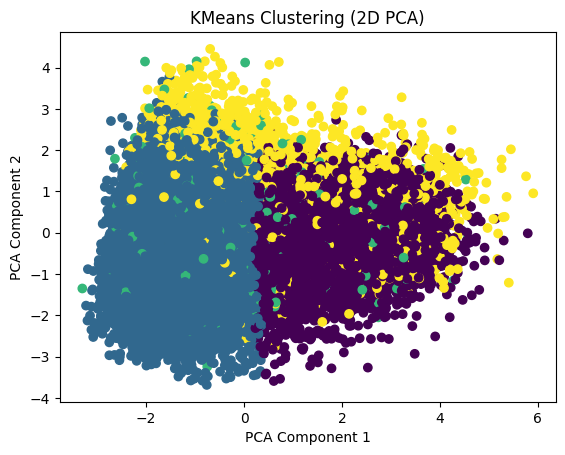

In [49]:
# 4. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(df_preprocessed)

# Add cluster labels to the original DataFrame
df['cluster'] = kmeans.labels_

# Analyze and visualize the clusters
print(df['cluster'].value_counts())

# Optional: Visualize clusters if reduced to 2 dimensions (e.g., using PCA)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_preprocessed)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (2D PCA)')
plt.show()

In [50]:
silhouette_avg = silhouette_score(df_preprocessed, kmeans.labels_)
print(f"The average silhouette score is: {silhouette_avg}")


The average silhouette score is: 0.2908727061582174


In [52]:
from sklearn.cluster import KMeans
import numpy as np

# Assuming kmeans is your trained KMeans model and df is your original DataFrame with 'cluster' column

# Key phrases mapping to preferences
phrase_to_preferences = {
    "party music": {'genre': 'dance', 'danceability': 0.8, 'energy': 0.8},
    "relaxing tunes": {'valence': 0.3, 'energy': 0.4},
    "upbeat songs": {'valence': 0.7, 'energy': 0.7}
    # Add more phrases and preferences as needed
}

# Example: Ask user for statement input
user_statement = input("Please enter your statement (e.g., 'party music'): ")

# Assume user_statement is one of the phrases defined
if user_statement.lower() in phrase_to_preferences:
    preferences = phrase_to_preferences[user_statement.lower()]

    # Extract preferences
    genre = preferences.get('genre', '')
    danceability = preferences.get('danceability', 0.5)
    energy = preferences.get('energy', 0.5)

    # Preprocess user input (assuming df_preprocessed columns order)
    user_input = np.array([[danceability, 0, 0, 0, 0, energy, 0]])

    # Predict cluster for user input
    predicted_cluster = kmeans.predict(user_input.reshape(1, -1))[0]

    # Get songs from predicted cluster
    cluster_songs = df[df['cluster'] == predicted_cluster].head(5)  # Adjust as per your dataset and preferences

    # Recommend songs
    print(f"\nRecommended Songs for '{user_statement}':")
    for index, row in cluster_songs.iterrows():
        print(f"Song: {row['track_name']}, Genre: {row['genre']}")
else:
    print("Sorry, the statement is not recognized. Please try again with a different statement.")



Recommended Songs for 'party music':
Song: patricia, Genre: pop
Song: opm medley: when i met you, Genre: pop
Song: you're the cream in my coffee, Genre: pop
Song: brazil, Genre: pop
Song: two hound dogs, Genre: pop
